In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def entropy4(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()


def remaining(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()





In [17]:
data2 = {
    "Attribute1": ['F', 'T', 'T', 'F', 'F','T','T'],
    "Attribute2": ['H', 'M', 'H', 'H', 'L','H','H'],
    "Attribute3": ['H', 'L', 'M', 'M', 'H','HH','H'],
    "Label": ['A', 'B', 'B', 'A', 'C','C','A']
}
attr1_en = LabelEncoder()
attr2_en = LabelEncoder()
attr3_en = LabelEncoder()
label_en = LabelEncoder()

from scipy.stats import entropy
df = pd.DataFrame(data2)
print(df)






  Attribute1 Attribute2 Attribute3 Label
0          F          H          H     A
1          T          M          L     B
2          T          H          M     B
3          F          H          M     A
4          F          L          H     C
5          T          H         HH     C
6          T          H          H     A


In [18]:
df['attr1_en'] = attr1_en.fit_transform(df['Attribute1'])
df['attr2_en'] = attr2_en.fit_transform(df['Attribute2'])
df['attr3_en'] = attr3_en.fit_transform(df['Attribute3'])
df['label_en'] = label_en.fit_transform(df['Label'])

#final = df.drop(['Attribute1','Attribute2','Attribute3','Label','attr1_en','attr2_en','attr3_en'],axis='columns')
final = df.drop(['Attribute1','Attribute2','Attribute3','Label'],axis='columns')
final

,attr1_en,attr2_en,attr3_en,label_en
0,0,0,0,0
1,1,2,2,1
2,1,0,3,1
3,0,0,3,0
4,0,1,0,2
5,1,0,1,2
6,1,0,0,0


In [19]:
entropy4(final['label_en'],2)

1.556656707462823

In [20]:
data2 = {
    "Attribute1": ['T', 'T', 'T', 'F', 'F','F'],
    "Attribute2": ['F', 'T', 'T', 'T', 'F','F'],
    "Attribute3": ['T', 'F', 'F', 'T', 'F','F'],
    "Label": ['S', 'S', 'S', 'H', 'H','H']
}
attr1_en = LabelEncoder()
attr2_en = LabelEncoder()
attr3_en = LabelEncoder()
label_en = LabelEncoder()

from scipy.stats import entropy
df = pd.DataFrame(data2)
print(df)

  Attribute1 Attribute2 Attribute3 Label
0          T          F          T     S
1          T          T          F     S
2          T          T          F     S
3          F          T          T     H
4          F          F          F     H
5          F          F          F     H


In [21]:
df['attr1_en'] = attr1_en.fit_transform(df['Attribute1'])
df['attr2_en'] = attr2_en.fit_transform(df['Attribute2'])
df['attr3_en'] = attr3_en.fit_transform(df['Attribute3'])
df['label_en'] = label_en.fit_transform(df['Label'])

#final = df.drop(['Attribute1','Attribute2','Attribute3','Label','attr1_en','attr2_en','attr3_en'],axis='columns')
final = df.drop(['Attribute1','Attribute2','Attribute3','Label'],axis='columns')
final

,attr1_en,attr2_en,attr3_en,label_en
0,1,0,1,1
1,1,1,0,1
2,1,1,0,1
3,0,1,1,0
4,0,0,0,0
5,0,0,0,0


In [22]:

#Entropy using User defined fucntion
entropy4(final['attr1_en'],2)

1.0

In [25]:
#Entropy using python lib
entropy(final.set_index('attr1_en').squeeze())

array([1.09861229, 0.69314718, 1.09861229])

In [23]:
entropy(final.set_index('attr2_en').squeeze())

array([1.09861229, 0.69314718, 1.09861229])

In [24]:
entropy(final.set_index('attr3_en').squeeze())

array([1.09861229, 1.09861229, 1.09861229])

[0.25 0.62 0.75 0.88 0.5  0.62 0.75 0.5  0.62 0.5  1.   0.88 0.62 0.75
 0.25 0.88 0.25 0.88 0.   0.5 ]
[0.   0.4  0.33 0.7  0.4  0.5  0.53 0.6  0.6  0.53 0.63 0.2  0.27 0.73
 0.2  0.27 0.33 1.   0.03 0.13]


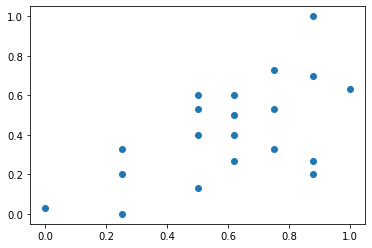

In [33]:
import numpy as np

def NormalizeData(data,range_min,range_max):
    
    normalized_value = (((data - np.min(data)) / (np.max(data) - np.min(data)) ) * (range_max-range_min)) + range_min
    return (normalized_value)



from sklearn import preprocessing
import numpy as np


X = [2,3.5,4,4.5,3,3.5,4,3,3.5,3,5,4.5,3.5,4,2,4.5,2,4.5,1,3]
Y = [0,12,10,21,12,15,16,18,18,16,19,6,8,22,6,8,10,30,1,4]


# 0 for range min and 1 for range max
normalized_x = np.round(NormalizeData(X,0,1),2)
normalized_y = np.round(NormalizeData(Y,0,1),2)
print(normalized_x )
print(normalized_y )

import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_subplot(111)
ax.plot(normalized_x,normalized_y)
#for xy in zip(normalized_x,normalized_y):                                       # <--
    #ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--

plt.scatter(normalized_x, normalized_y)
plt.show()


In [32]:
X1 = np.array([295,890,406,293,651])

norm_data = NormalizeData(X1,0,1)

In [ ]:
np.mean(norm_data)



In [ ]:
np.var(norm_data)

In [ ]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = numerator/denominator
    return cor

In [ ]:

y = [30,95,31,32,76]
x = [1,2,3,5,6]

covariance(x,y)

In [ ]:
correlation(x,y)